<a href="https://colab.research.google.com/github/cychen116/DataAnalysis_practice/blob/main/11_ML_Logistic_FeatureSelection_HRdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data and Package Loading

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/EMSE 6575/Data"
!ls "/content/drive/MyDrive/Colab Notebooks/EMSE 6575/Data"

 archive.zip
'breast cancer.csv'
 breast_cancer_data.csv
'Breast Cancer Dignostics_google.ipynb'
'Breast Cancer Dignostics.ipynb'
 diamonds.csv
 gender_submission.csv
'Group Project 1 Text for Analysis -- full version(1).txt'
 HR_comma_sep.csv
 iris.csv
 spam.csv
 spam_resaved.xlsx
 spam.xlsx
 test.csv
 train.csv
 train-images-idx3-ubyte.gz
 train-labels-idx1-ubyte.gz


In [2]:
import numpy as np
from numpy import log, dot, e
from numpy.random import rand, randint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

epsilon = 0.00000000000000000000000000001

In [5]:
data = pd.read_csv(data_dir+'/HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
# checking missing values and caculate the number
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [8]:
# Labeling the data
data['depart_code'] = data['Department'].astype('category').cat.codes
data['salary_level'] = data['salary'].astype('category').cat.codes

# EDA

0    11428
1     3571
Name: left, dtype: int64


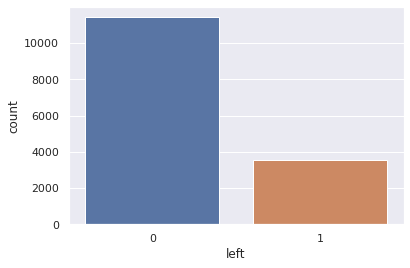

In [9]:
sns.set_theme(style="darkgrid")
print(data['left'].value_counts())
sns.countplot(x = 'left', data = data)
plt.show()

In [10]:
left = data[data["left"]==1].count()['left']
stay = data[data["left"]==0].count()['left']
total = left+stay
print('employee left percentage : ', round(left/total*100,2),'%')
print('employee stay percentage : ', round(stay/total*100,2),'%')

employee left percentage :  23.81 %
employee stay percentage :  76.19 %


In [11]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,depart_code,salary_level
left,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,5.819041,1.347742
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,6.035284,1.345842


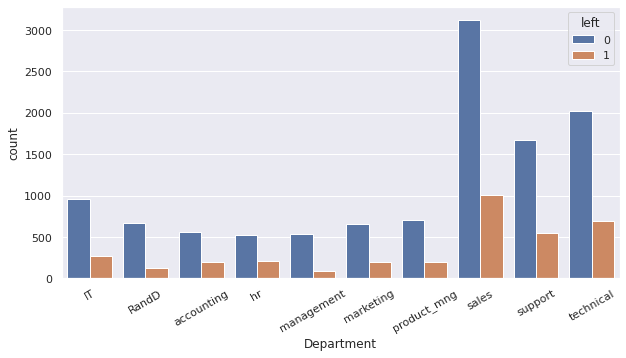

In [12]:
plt.figure(figsize=(10,5))
df = data.sort_values(['depart_code'])
chart_d = sns.countplot(x = 'Department', data = df, hue='left')
chart_d.set_xticklabels(chart_d.get_xticklabels(),rotation=30)
plt.show()
### bar is ordering by depart_code

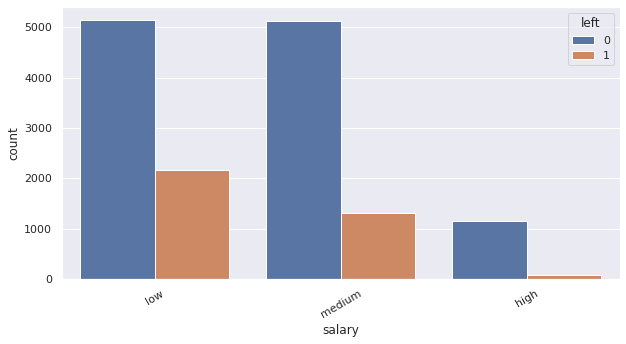

In [13]:
plt.figure(figsize=(10,5))
df = data.sort_values(['salary_level'])
chart_s = sns.countplot(x = 'salary', data = data, hue='left')
chart_s.set_xticklabels(chart_s.get_xticklabels(),rotation=30)
plt.show()
### bar is ordering by salary_level

# Model Feature Selection by Sklearn

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, confusion_matrix, log_loss, explained_variance_score,r2_score
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score, mean_squared_log_error

##  One-Hot Encoding

In [16]:
data_onehot = pd.get_dummies(data)
data_onehot.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,depart_code,salary_level,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,7,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,7,2,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,7,2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,7,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,7,1,0,0,0,0,0,0,0,1,0,0,0,1,0


## Model Training - All

### Data Spliting

In [17]:
features = data_onehot.columns.to_list()
features.remove('left')

In [23]:
X = data_onehot[features]
y = data_onehot['left']
print(X.shape)
print(y.shape)

(14999, 22)
(14999,)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)

In [26]:
lr = LogisticRegression(random_state=0, max_iter=3000)
model = lr.fit(X_train,y_train)
pred = model.predict(X_test)

MAE=  0.21013333333333334
MSE=  0.21013333333333334
RMS=  0.45840302500456226
EVS=  -0.11045469641995509
MSLE=  0.10095919332467805
R^2=  -0.15734213148346576


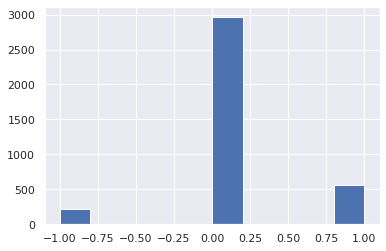

In [27]:
errors = y_test - pred
errors.hist()
print('MAE= ', metrics.mean_absolute_error(y_test,pred))
print('MSE= ', metrics.mean_squared_error(y_test,pred))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('EVS= ', explained_variance_score(y_test,pred))
print('MSLE= ', mean_squared_log_error(y_test,pred))
print('R^2= ', r2_score(y_test,pred))

## Feature Selection

In [28]:
from sklearn.feature_selection import RFE
rfe = RFE(lr, n_features_to_select=7)
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True False False False False  True  True False  True False  True False
 False False False False False False False  True  True False]
[ 1  6  7 14  5  1  1 15  1  9  1 16  3  4 12  2 13 11 10  1  1  8]


In [31]:
# Only keep the one label #!
new_features = ['satisfaction_level', #1
 #'last_evaluation', #6
 #'number_project', #7
 #'average_montly_hours', #14
 #'time_spend_company', #5
 'Work_accident', #1
 'promotion_last_5years', #1
 #'depart_code', #15
 'salary_level', #1
 #'Department_IT',#9
 'Department_RandD',#1
 #'Department_accounting', #16
 #'Department_hr', #3
 #'Department_management', #4
 #'Department_marketing',#12
 #'Department_product_mng',#2
 #'Department_sales',#13
 #'Department_support',#11
 #'Department_technical',#10
 'salary_high',#1
 'salary_low',#1
 #'salary_medium' #8
 ] 
X = data_onehot[new_features]

# Model Implement by statsmodels, sklearn

In [35]:
import statsmodels.api as sm
logit=sm.Logit(y,X)
result=logit.fit()
print(result.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.445625
         Iterations 7
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.188     
Dependent Variable:    left              AIC:               13381.8542
Date:                  2022-02-24 02:25  BIC:               13435.1644
No. Observations:      14999             Log-Likelihood:    -6683.9   
Df Model:              6                 LL-Null:           -8232.3   
Df Residuals:          14992             LLR p-value:       0.0000    
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        7.0000                                         
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
satisfaction_level    -3.8380   0.0900 -42.6326 0.0000 -4.0145 -3.6616
Wor

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)

In [39]:
lr = LogisticRegression(random_state=0, max_iter=3000)
model = lr.fit(X_train,y_train)
y_pred = model.predict(X_test)

MAE=  0.216
MSE=  0.216
RMS=  0.46475800154489
EVS=  -0.12056567593480394
MSLE=  0.10377785100633148
R^2=  -0.18965371383452712
Score=  0.784


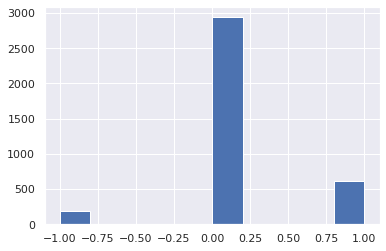

In [40]:
errors = y_test - y_pred
errors.hist()
print('MAE= ', metrics.mean_absolute_error(y_test,y_pred))
print('MSE= ', metrics.mean_squared_error(y_test,y_pred))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('EVS= ', explained_variance_score(y_test,y_pred))
print('MSLE= ', mean_squared_log_error(y_test,y_pred))
print('R^2= ', r2_score(y_test,y_pred))
print('Score= ', lr.score(X_test, y_test))

# Result Analysis

In [41]:
cm = metrics.confusion_matrix(y_test, y_pred)
true_pos = cm[1,1]
true_neg = cm[0,0]
false_pos = cm[0,1]
false_neg = cm[1,0]
precision = true_pos/(true_pos + false_pos)
recall = true_pos/(true_pos + false_neg)

print("When we check precision of our model against the test data set, " + str(len(y_test)) + " employees")
print("")
print("Precision " + str(cm[1,1] + cm[0,1]) + " times and were correct " + str(cm[1,1]) + " times: " + str(cm[1,1]/(cm[1,1] + cm[0,1]))[0:5])
print("Recall" + str(cm[1,1]) + " out of the " + str(cm[1,1] + cm[1,0]) + " subscriptions: " + str(recall)[0:5])
print("")
print("Our total accuracy was " + str((cm[0,0] + cm[1,1])/len(y_test))[0:5])
print("Our F1 score was " + str(2*(precision*recall)/(precision+recall))[0:5])

When we check precision of our model against the test data set, 3750 employees

Precision 474 times and were correct 279 times: 0.588
Recall279 out of the 894 subscriptions: 0.312

Our total accuracy was 0.784
Our F1 score was 0.407


In [42]:
metrics.precision_score(y_test, y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)

true_neg = str(cm[0,0]) + "/" + str(cm[0,0] + cm[1,0]) + " (" + str(cm[0,0]/(cm[0,0] + cm[1,0]))[0:5] + ")"
false_pos = str(cm[0,1]) + "/" + str(cm[0,1] + cm[1,1]) + " (" + str(cm[0,1]/(cm[0,1] + cm[1,1]))[0:5] + ")"
false_neg = str(cm[1,0]) + "/" + str(cm[1,0] + cm[0,0]) + " (" + str(cm[1,0]/(cm[1,0] + cm[0,0]))[0:5] + ")"
true_pos = str(cm[1,1]) + "/" + str(cm[1,1] + cm[0,1]) + " (" + str(cm[1,1]/(cm[1,1] + cm[0,1]))[0:5] + ")"

conf_matrix = pd.DataFrame({'Left': [true_neg, false_neg],
                            'Stay': [false_pos, true_pos],
                            'Support': [cm[0,0] + cm[0,1], cm[1,0] + cm[1,1]]},
                    index = ['Left', 'Stay'])
conf_matrix

,Left,Stay,Support
Left,2661/3276 (0.812),195/474 (0.411),2856
Stay,615/3276 (0.187),279/474 (0.588),894


In [43]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2856
           1       0.59      0.31      0.41       894

    accuracy                           0.78      3750
   macro avg       0.70      0.62      0.64      3750
weighted avg       0.76      0.78      0.76      3750



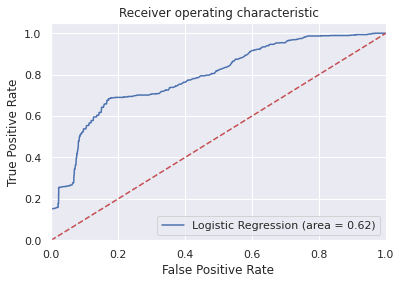

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lr_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Build Model Without Package

In [45]:
from numpy.random import rand, randint
from numpy import log, dot, e
epsilon = 0.00000000000000000000000000001

def sigmoid(z): return (1 / (1 + e**(-z)))

#### STARTING CONDITION -->> RANDOM
weights = rand(X_train.shape[1])

#### BLACK BOX 
def predict(X):
  z=sigmoid(dot(X,weights))
  return([1 if i > 0.5 else 0 for i in z])

### COST FUNCTION ---> this is how good our whole algorithm is
def cost_function(X,y,weights):
  y_hat = sigmoid(dot(X,weights))
  pred_1 = y*log(y_hat+epsilon)
  pred_0 = (1-y)*log(1-y_hat+epsilon)
  mean = - sum(pred_1 + pred_0)/len(X)
  return(mean)

In [46]:
X = X_train
y = y_train
y_h=cost_function(X,y,weights)

In [47]:
def random_walk(X,y):
  best_weights = []
  best_cost = 1000000000
  cost = []

  for _ in range(25):
    weights = rand(X.shape[1])
    c = cost_function(X,y,weights) #<<<---- $$$$ cost
    if c < best_cost:
      best_cost=c
      best_weights=weights
    cost.append(c)

  return(cost,best_weights)

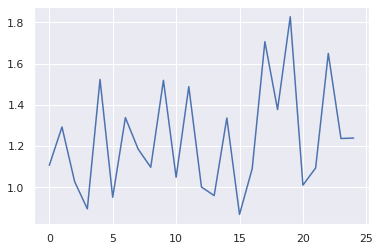

In [48]:
loss, weights = random_walk(X,y)
plt.plot(loss)

In [49]:
def fit(X,y,epochs=25,lr=0.01):
  loss = []
  weights = rand(X.shape[1])
  n = len(X)
  for _ in range(epochs):
    y_hat = sigmoid(dot(X,weights))
    delta = lr* dot(X.T, y_hat-y)/n
    weights -= delta
    loss.append(cost_function(X,y,weights))

    ### better stopping condition - derivative
    #if sum(delta)/len(delta) < 0.001:
    #  break

  return(loss,weights)

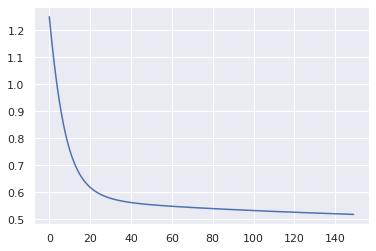

In [50]:
loss,weights = fit(X,y,epochs = 150, lr=0.1)
plt.plot(loss)

## Prediction

In [51]:
prediction_df = pd.DataFrame({'prediction': predict(X), 'truth': y})
prediction_df['result'] = None
prediction_df.head()

,prediction,truth,result
11286,0,0,None
14326,0,1,None
10187,0,0,None
8294,0,0,None
14245,0,1,None


In [52]:
prediction_df['result'][(prediction_df['prediction'] == 0) & (prediction_df['truth'] == 0)] = "true_neg"
prediction_df['result'][(prediction_df['prediction'] == 0) & (prediction_df['truth'] == 1)] = "false_neg"
prediction_df['result'][(prediction_df['prediction'] == 1) & (prediction_df['truth'] == 0)] = "false_pos"
prediction_df['result'][(prediction_df['prediction'] == 1) & (prediction_df['truth'] == 1)] = "true_pos"
results = prediction_df['result'].value_counts()
results

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

true_neg     8567
false_neg    2676
false_pos       5
true_pos        1
Name: result, dtype: int64

In [53]:

true_pos = results[3]
true_neg = results[0]
false_pos = results[1]
false_neg = results[2]
precision = true_pos/(true_pos + false_pos)
recall = true_pos/(true_pos + false_neg)

print("When we check precision of our model against the test data set, " + str(len(y)) + " users")
print("")
print("Precision - We predicted a subscription " + str(true_pos + false_pos) + " times and were correct " + str(true_pos) + " times: " + str(true_pos/(true_pos + false_pos))[0:5])
print("Recall - We predicted " + str(true_pos) + " out of the " + str(true_pos + false_neg) + " subscriptions: " + str(recall)[0:5])
print("")
print("Our total accuracy was " + str((true_pos + true_neg)/len(y))[0:5])
print("Our F1 score was " + str(2*(precision*recall)/(precision+recall))[0:5])

When we check precision of our model against the test data set, 11249 users

Precision - We predicted a subscription 2677 times and were correct 1 times: 0.000
Recall - We predicted 1 out of the 6 subscriptions: 0.166

Our total accuracy was 0.761
Our F1 score was 0.000
